In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn import linear_model
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)

In [3]:
# ix -> iloc
boston = load_boston()
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target'] = boston.target
observations = len(dataset)
variables = dataset.columns[:-1]
X = dataset.iloc[:,:-1]
y = dataset['target'].values

In [17]:
yq = np.array(y>25, dtype=int)

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
linear_regression = linear_model.LinearRegression(normalize=False,
                                                 fit_intercept=True)
linear_regression.fit(X,y)
print("coefficients : %s\nintercept : %0.3f"
      %(linear_regression.coef_,linear_regression.intercept_))

coefficients : [ -0.10801   0.04642   0.02056   2.68673 -17.76661   3.80987   0.00069
  -1.47557   0.30605  -0.01233  -0.95275   0.00931  -0.52476]
intercept : 36.459


In [11]:
centering = StandardScaler(with_mean=True, with_std=False)
linear_regression.fit(centering.fit_transform(X),y)
print("coefficients : %s\nintercept : %0.3f"
      %(linear_regression.coef_,linear_regression.intercept_))

coefficients : [ -0.10801   0.04642   0.02056   2.68673 -17.76661   3.80987   0.00069
  -1.47557   0.30605  -0.01233  -0.95275   0.00931  -0.52476]
intercept : 22.533


In [13]:
print('mean : %0.3f'%np.mean(y))

mean : 22.533


# Page 192

In [14]:
standardization = StandardScaler(with_mean=True, with_std=True)
linear_regression.fit(standardization.fit_transform(X),y)
print("coefficients : %s\nintercept : %0.3f"
      %(linear_regression.coef_,linear_regression.intercept_))

coefficients : [-0.92815  1.08157  0.1409   0.68174 -2.05672  2.67423  0.01947 -3.10404
  2.66222 -2.07678 -2.06061  0.84927 -3.74363]
intercept : 22.533


In [15]:
scaling = MinMaxScaler(feature_range=(0,1))
linear_regression.fit(scaling.fit_transform(X),y)
print("coefficients : %s\nintercept : %0.3f"
      %(linear_regression.coef_,linear_regression.intercept_))

coefficients : [ -9.60976   4.64205   0.56084   2.68673  -8.63457  19.88369   0.06722
 -16.22666   7.03914  -6.46333  -8.95582   3.69283 -19.01724]
intercept : 26.620


In [18]:
import statsmodels.api as sm
Xq = sm.add_constant(standardization.fit_transform(X))
logit = sm.Logit(yq,Xq)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.206631
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  506
Model:                          Logit   Df Residuals:                      492
Method:                           MLE   Df Model:                           13
Date:                Wed, 29 Jul 2020   Pseudo R-squ.:                  0.6289
Time:                        01:33:22   Log-Likelihood:                -104.56
converged:                       True   LL-Null:                       -281.76
Covariance Type:            nonrobust   LLR p-value:                 9.145e-68
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0542      0.356     -8.571      0.000      -3.753      -2.356
x1            -0.0954      0.

In [19]:
print('odd ratios of coefficients : %s' % np.exp(result.params))

odd ratios of coefficients : [ 0.04716  0.90902  1.28964  0.46908  1.27788  0.45278  3.76007  1.10314
  0.28965 15.90341  0.16158  0.46603  0.81345  0.07275]


In [26]:
def sigmoid(p) : 
    return 1/(1+np.exp(-p))

print('intercept : %0.3f' %result.params[0])
print('probability of value above 25 when all predictors are \n\
average : %0.3f' % sigmoid(result.params[0]))

intercept : -3.054
probability of value above 25 when all predictors are 
average : 0.045


In [27]:
print('average likelihood of positive response : %0.3f'
      % (sum(yq) / float(len(yq))))

average likelihood of positive response : 0.245


In [28]:
C = np.ones(len(X))
logit = sm.Logit(yq,C)
result = logit.fit()
print(result.summary())
print('\n probability of value above 25 using just a \n\
constant : %0.3f' %sigmoid(result.params[0]))

Optimization terminated successfully.
         Current function value: 0.556842
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  506
Model:                          Logit   Df Residuals:                      505
Method:                           MLE   Df Model:                            0
Date:                Wed, 29 Jul 2020   Pseudo R-squ.:               3.276e-11
Time:                        01:38:06   Log-Likelihood:                -281.76
converged:                       True   LL-Null:                       -281.76
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1251      0.103    -10.886      0.000      -1.328      -0.923

 probability of value above 

# Page 197

In [45]:
outlook = ['sunny', 'overcast', 'rainy']
temperature = ['hot', 'mild', 'cool']
humidity = ['high', 'normal']
windy = ['TRUE', 'FALSE']

weather_dataset = list()

for o in outlook : 
    for t in temperature : 
        for h in humidity : 
            for w in windy : 
                weather_dataset.append([o,t,h,w])
                
play = [0,0,1,1,1,0,1,1,0,0,0,1,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,1]

In [46]:
import pandas as pd
df = pd.DataFrame(weather_dataset, columns=['outlook', 'temperature', 'humidity', 'windy'])
df

,outlook,temperature,humidity,windy
0,sunny,hot,high,TRUE
1,sunny,hot,high,FALSE
2,sunny,hot,normal,TRUE
3,sunny,hot,normal,FALSE
4,sunny,mild,high,TRUE
5,sunny,mild,high,FALSE
6,sunny,mild,normal,TRUE
7,sunny,mild,normal,FALSE
8,sunny,cool,high,TRUE
9,sunny,cool,high,FALSE


In [47]:
pd.get_dummies(df.humidity).iloc[:5,:]

,high,normal
0,1,0
1,1,0
2,0,1
3,0,1
4,1,0


In [48]:
dummy_encoding = pd.get_dummies(df)

In [49]:
import statsmodels.api as sm
X = sm.add_constant(dummy_encoding)
logit = sm.Logit(play, X)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.292346
         Iterations 28
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   36
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            6
Date:                Wed, 29 Jul 2020   Pseudo R-squ.:                  0.5744
Time:                        01:50:16   Log-Likelihood:                -10.524
converged:                       True   LL-Null:                       -24.731
Covariance Type:            nonrobust   LLR p-value:                 7.856e-05
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2393    4.3e+07   5.57e-09      1.000   -8.42e+07    8.42e+07
outlook_ov

C:\Users\seong\Anaconda3\envs\datacenter\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\seong\Anaconda3\envs\datacenter\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [50]:
X.drop(['outlook_sunny', 'temperature_mild',
        'humidity_normal', 'windy_FALSE'], inplace=True, axis=1)
logit = sm.Logit(play, X)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.292346
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   36
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            6
Date:                Wed, 29 Jul 2020   Pseudo R-squ.:                  0.5744
Time:                        01:50:17   Log-Likelihood:                -10.524
converged:                       True   LL-Null:                       -24.731
Covariance Type:            nonrobust   LLR p-value:                 7.856e-05
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.4055      2.196      2.462      0.014       1.102       9.709
outlook_ove

In [52]:
from sklearn.feature_extraction import DictVectorizer
vectorizer = DictVectorizer(sparse=False)
dict_representation = [{varname:var for var, varname in zip(
                        row,['outlook', 'temperature','humidity','windy'])}
                        for row in weather_dataset]
print(dict_representation[0])
print(vectorizer.fit_transform(dict_representation))

{'outlook': 'sunny', 'temperature': 'hot', 'humidity': 'high', 'windy': 'TRUE'}
[[1. 0. 0. 0. 1. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 1. 0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 1. 0. 0. 1. 0. 1.]
 [0. 1. 0. 0. 1. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1. 1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 1. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 1. 0. 0. 1. 0.]
 [1. 0. 1. 0. 0. 0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0. 0. 1. 0. 1. 0.]
 [0. 1. 1. 0. 0. 0. 1. 0. 0. 1.]
 [0. 1. 1. 0. 0. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 0. 0. 0. 1. 0. 1.]
 [1. 0. 1. 0. 0. 0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0. 0. 0. 1. 0. 1.]
 [0. 1. 1. 0. 0. 0. 0. 1. 1. 0.]
 [1. 0. 1. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0. 1. 0. 0. 1. 0.]
 [0. 1. 1. 0. 0. 1. 0. 0. 0. 1.]
 [0. 1. 1. 0. 0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 1. 0. 1. 

In [54]:
print(vectorizer.feature_names_)

['humidity=high', 'humidity=normal', 'outlook=overcast', 'outlook=rainy', 'outlook=sunny', 'temperature=cool', 'temperature=hot', 'temperature=mild', 'windy=FALSE', 'windy=TRUE']


In [56]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
label_encoder = LabelEncoder()
print(label_encoder.fit_transform(df.outlook))

[2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [58]:
print(label_encoder.inverse_transform([0,1,2]))
print(label_encoder.classes_)

['overcast' 'rainy' 'sunny']
['overcast' 'rainy' 'sunny']


In [62]:
label_binarizer = LabelBinarizer(neg_label=0, pos_label=1,sparse_output=False)
print(label_binarizer.fit_transform(label_encoder.fit_transform(df.outlook)))

[[0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]]


In [65]:
your_text = '왜냐하면 그것이 약속이기 때문에 음!'
mapping_words_in_text = {word:position for position, word in
                        enumerate(set(your_text.lower().split(' ')))}
print(mapping_words_in_text)

{'약속이기': 0, '그것이': 1, '때문에': 2, '왜냐하면': 3, '음!': 4}


In [79]:
corpus = ['The Quick fox jumped over the lazy dog',
          'I sought a dog wondering around with a bird',
          'My dog is named Fido']

In [69]:
from sklearn.feature_extraction.text import CountVectorizer
textual_one_hot_encoder = CountVectorizer(binary=True)
textual_one_hot_encoder.fit(corpus)
vectorized_text = textual_one_hot_encoder.transform(corpus)
print(vectorized_text.todense())

[[0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0]
 [1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1]
 [0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0]]


In [72]:
print(textual_one_hot_encoder.get_feature_names())
print(textual_one_hot_encoder.transform(['John went home today']).todense())

['around', 'bird', 'dog', 'fido', 'fox', 'is', 'jumped', 'lazy', 'my', 'named', 'over', 'quick', 'sought', 'the', 'with', 'wondering']
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [81]:
# non_negative -> alternate_sign
from sklearn.feature_extraction.text import HashingVectorizer
hashing_trick = HashingVectorizer(n_features=11, binary=True,
                                 norm=None, alternate_sign=True)
M = hashing_trick.transform(corpus)
print(M.todense())

[[1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0.]]


In [98]:
print(hashing_trick.transform(['John is the owner of that dog']).todense())

[[1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0.]]


# Page 209

In [225]:
import numpy as np
boston = load_boston()
labels = boston.feature_names
X = boston.data
y = boston.target
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [226]:
linear_regression = linear_model.LinearRegression(fit_intercept=True)
linear_regression.fit(X,y)

LinearRegression()

In [227]:
from sklearn.metrics import r2_score
print("R-squared  %0.3f" % r2_score(y, linear_regression.predict(X)))

R-squared  0.741


In [228]:
residuals = y - linear_regression.predict(X)
print("Head of residual : %s" % residuals[:5])
print("Mean of residual : %0.3f" % np.mean(residuals))
print("Standard deviation of residuals : %0.3f" % np.std(residuals))

Head of residual : [-6.00384 -3.42556  4.1324   4.79296  8.25648]
Mean of residual : 0.000
Standard deviation of residuals : 4.679


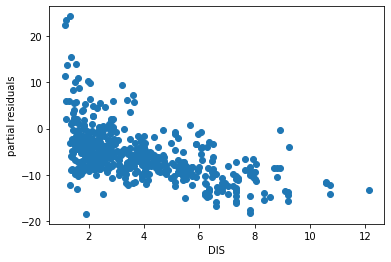

In [229]:
var = 7
partial_residual = residual + X[:, var] * linear_regression.coef_[var]
plt.plot(X[:,var], partial_residual, 'o')
plt.xlabel(boston.feature_names[var])
plt.ylabel('partial residuals')
plt.show()

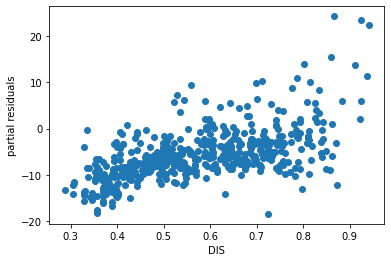

R-squared : 0.341


In [230]:
X_t = X.copy()
X_t[:,var] = 1./np.sqrt(X_t[:,var])
linear_residual = residuals + X_t[:,var] * linear_regression.coef_[var]
plt.plot(X_t[:,var], partial_residual, 'o')
plt.xlabel(boston.feature_names[var])
plt.ylabel('partial residuals')
plt.show()
print("R-squared : %0.3f" %r2_score(y, linear_regression.predict(X_t)))

In [231]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer
LB = LabelBinarizer()
X_t = X.copy()
edges = np.histogram(X_t[:,var], bins=20)[1]
binning = np.digitize(X_t[:,var], edges)
X_t = np.column_stack((np.delete(X_t, var, axis=1),LB.fit_transform(binning)))
linear_regression.fit(X_t,y)
print("R-squared : %0.3f" %r2_score(y, linear_regression.predict(X_t)))

R-squared : 0.768


# Page 215

In [200]:
import numpy as np
example = np.array([1,2,np.nan,4,5])
print(example)
print(np.isnan(example))
print(np.nan_to_num(example))

[ 1.  2. nan  4.  5.]
[False False  True False False]
[1. 2. 0. 4. 5.]


In [201]:
missing = np.isnan(example)
replacing_value = np.mean(example[~missing])
example[missing] = replacing_value
print(example)

[1. 2. 3. 4. 5.]


In [202]:
from random import sample, seed
import numpy as np
seed(19)
Xm = X.copy()
missing = sample(range(len(y)), len(y)//4)
Xm[missing,5] = np.nan
print("Header of Xm[:,5] : %s" % Xm[:10,5])

Header of Xm[:,5] : [6.575   nan 7.185   nan 7.147 6.43  6.012 6.172   nan 6.004]


바뀐부분 많음, Imputer -> SimpleImputer

In [218]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
print(Xm.shape)
impute = SimpleImputer(missing_values = np.nan, strategy='mean')
imputed_X = impute.fit_transform(Xm.T).T
print("Header of imputed Xm[:,5] : %s" % imputed_X[:,5][:10])

(506, 13)
Header of imputed Xm[:,5] : [ 6.575   63.27278  7.185   57.98355  7.147    6.43     6.012    6.172
 72.91228  6.004  ]


In [204]:
missing_indicator = np.isnan(Xm[:,5]).astype(int)
print("Header of missing indicator : %s" %missing_indicator[:10])

Header of missing indicator : [0 1 0 1 0 0 0 0 1 0]


In [242]:
boston = load_boston()
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
labels = boston.feature_names
X = dataset
y = boston.target

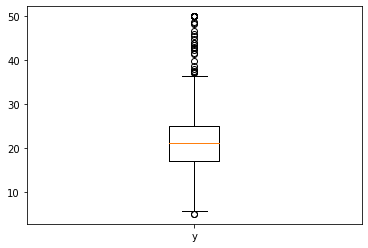

In [206]:
plt.boxplot(y,labels=('y'))
plt.show()

In [207]:
# 메소드 추가, predict(X) -> fit(X,y).predict(X)
def standardize(x) : 
    return (x-np.mean(x))/np.std(x)

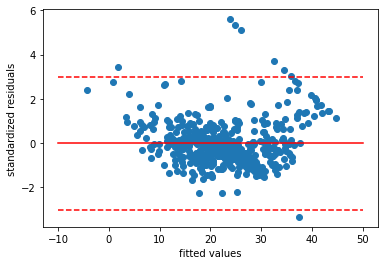

In [252]:
scatter = plt.plot(linear_regression.fit(X,y).predict(X), standardize(residuals), 'o')
plt.plot([-10,50],[0,0],"r-")
plt.plot([-10,50],[3,3],"r--")
plt.plot([-10,50],[-3,-3],"r--")
plt.xlabel('fitted values')
plt.ylabel('standardized residuals')
plt.show()

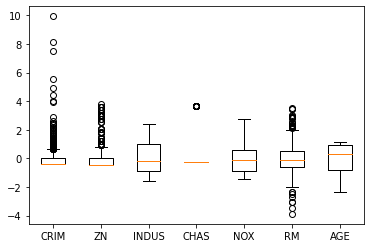

In [253]:
standarization = StandardScaler(with_mean=True, with_std=True)
Xs = standarization.fit_transform(X)
boxplot = plt.boxplot(Xs[:,0:7],labels=labels[0:7])

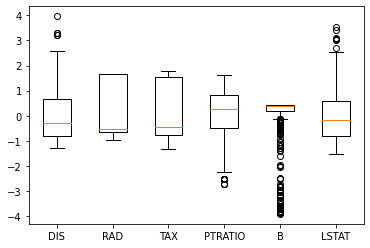

In [254]:
boxplot = plt.boxplot(Xs[:,7:13],labels=labels[7:13])

In [255]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(Xs)
C = pca.transform(Xs)
print(pca.explained_variance_ratio_)

[0.4713  0.11025 0.09559 0.06597 0.06422 0.05057 0.04118 0.03047 0.0213
 0.01694 0.01431 0.01302 0.00489]


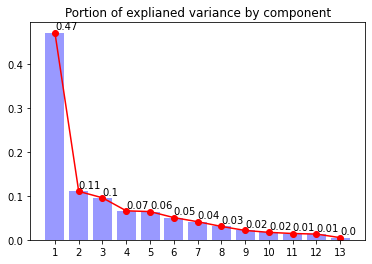

In [262]:
import numpy as np
import matplotlib.pyplot as plt
explained_variance = pca.explained_variance_ratio_
plt.title('Portion of explianed variance by component')
range_ = [r+1 for r in range(len(explained_variance))]
plt.bar(range_,explained_variance,color='b',alpha=0.4,align="center")
plt.plot(range_,explained_variance,'ro-')
for pos,pct in enumerate(explained_variance) : 
    plt.annotate(str(round(pct,2)), (pos+1,pct+0.007))
plt.xticks(range_)
plt.show()

Text(0, 0.5, 'Dimentsion 2')

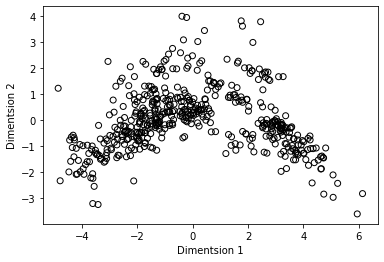

In [265]:
scatter = plt.scatter(C[:,0], C[:,1], facecolors='none', edgecolors='black')
plt.xlabel('Dimentsion 1')
plt.ylabel('Dimentsion 2')

Text(0, 0.5, 'Dimentsion 3')

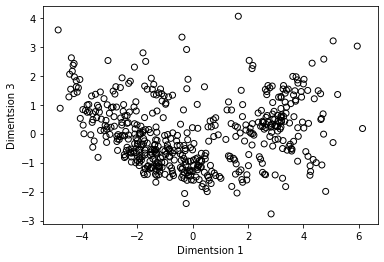

In [266]:
scatter = plt.scatter(C[:,0], C[:,2], facecolors='none', edgecolors='black')
plt.xlabel('Dimentsion 1')
plt.ylabel('Dimentsion 3')